# Multiple Linear Regression Model for Estimation Fuel Consumtion/100km based Engine spesification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv ("automobileEDA.csv")
Data1 = data.copy()

In [3]:
Dataset = Data1[["normalized-losses","engine-size","bore","stroke","compression-ratio","horsepower","peak-rpm","city-L/100km"]]
Dataset

,normalized-losses,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km
0,122,130,3.47,2.68,9.0,111.0,5000.0,11.190476
1,122,130,3.47,2.68,9.0,111.0,5000.0,11.190476
2,122,152,2.68,3.47,9.0,154.0,5000.0,12.368421
3,164,109,3.19,3.40,10.0,102.0,5500.0,9.791667
4,164,136,3.19,3.40,8.0,115.0,5500.0,13.055556
...,...,...,...,...,...,...,...,...
196,95,141,3.78,3.15,9.5,114.0,5400.0,10.217391
197,95,141,3.78,3.15,8.7,160.0,5300.0,12.368421
198,95,173,3.58,2.87,8.8,134.0,5500.0,13.055556
199,95,145,3.01,3.40,23.0,106.0,4800.0,9.038462


**Linearity**

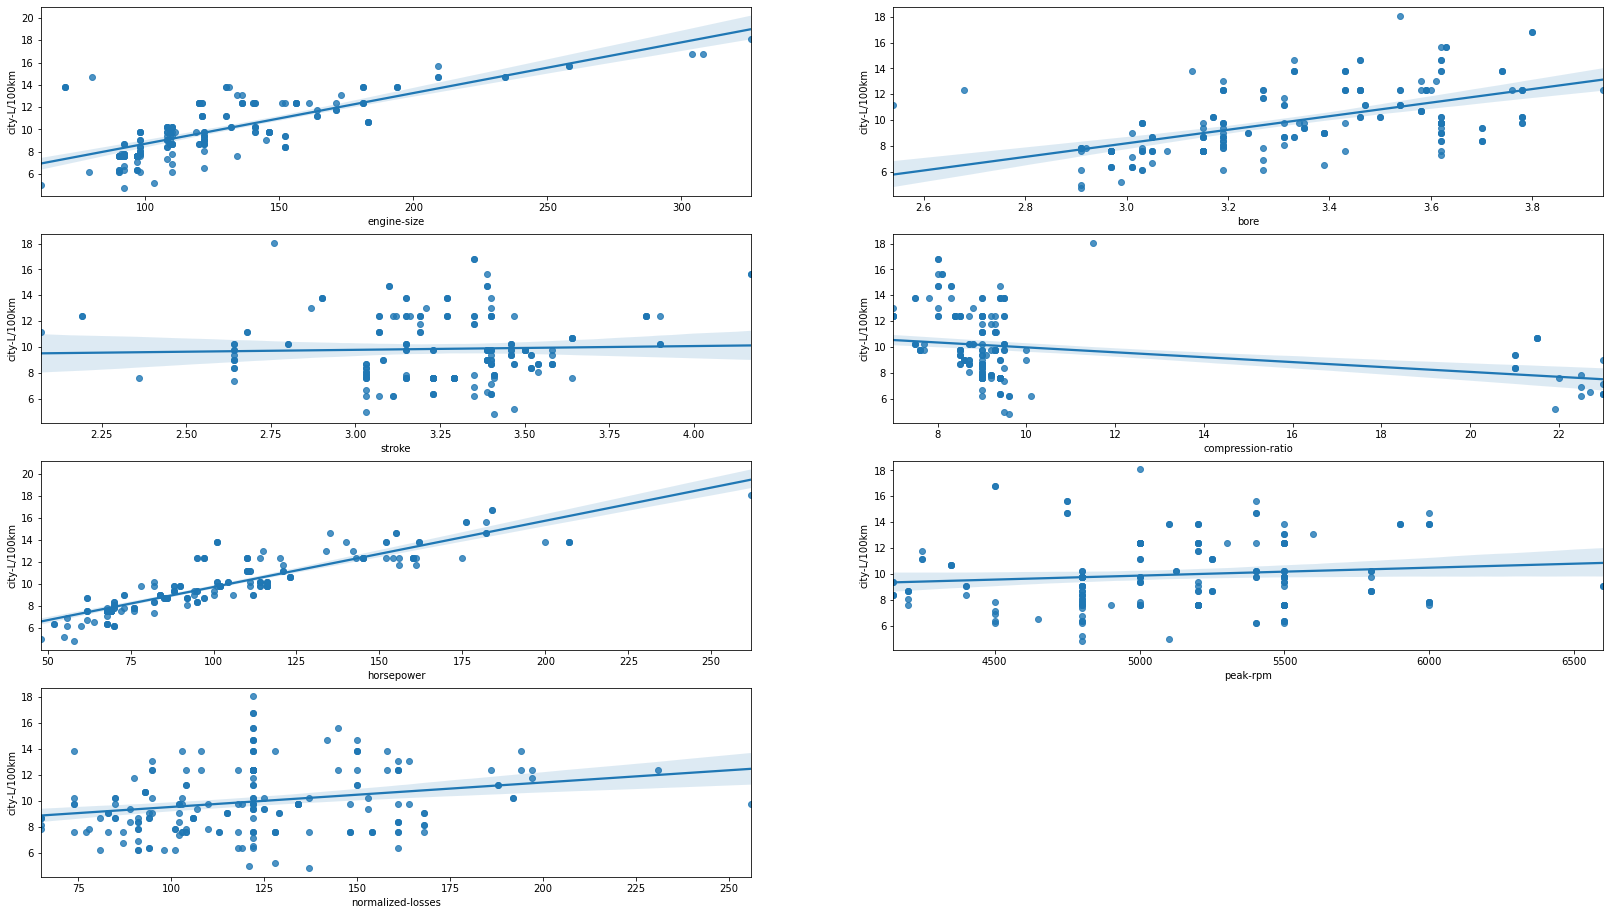

In [4]:
plt.figure(figsize=(28,16))
plt.subplot(4,2,1)
sns.regplot(x = 'engine-size', y = 'city-L/100km', data = Dataset)


plt.subplot(4,2,2)
sns.regplot(x = 'bore', y = 'city-L/100km', data = Dataset)

plt.subplot(4,2,3)
sns.regplot(x = 'stroke', y = 'city-L/100km', data = Dataset)

plt.subplot(4,2,4)
sns.regplot(x = 'compression-ratio', y = 'city-L/100km', data = Dataset)

plt.subplot(4,2,5)
sns.regplot(x = 'horsepower', y = 'city-L/100km', data = Dataset)

plt.subplot(4,2,6)
sns.regplot(x = 'peak-rpm', y = 'city-L/100km', data = Dataset)

plt.subplot(4,2,7)
sns.regplot(x = 'normalized-losses', y = 'city-L/100km', data = Dataset)


plt.show()

In [5]:
Dataset_mod = Dataset[["engine-size","bore","horsepower","city-L/100km"]]
Dataset_mod

,engine-size,bore,horsepower,city-L/100km
0,130,3.47,111.0,11.190476
1,130,3.47,111.0,11.190476
2,152,2.68,154.0,12.368421
3,109,3.19,102.0,9.791667
4,136,3.19,115.0,13.055556
...,...,...,...,...
196,141,3.78,114.0,10.217391
197,141,3.78,160.0,12.368421
198,173,3.58,134.0,13.055556
199,145,3.01,106.0,9.038462


**Modeling Multiple Linear Regression**

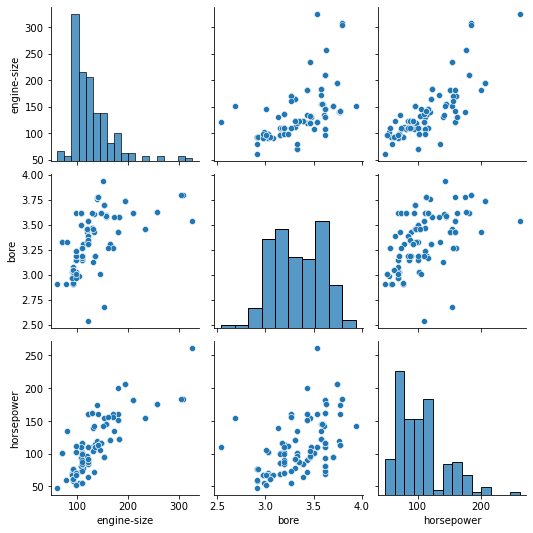

In [6]:
y = Dataset_mod[["city-L/100km"]]
x = Dataset_mod.drop(columns = y)
sns.pairplot(x)

**Standarization Data**

In [7]:
def z_score (df):
    df_z = df.copy()
    for column in df_z.columns :
        df_z[column] = (df_z[column]-df_z[column].mean())/df_z[column].std()
    return df_z

x_new = z_score(x)
x_new

,engine-size,bore,horsepower
0,0.075201,0.519668,0.203247
1,0.075201,0.519668,0.203247
2,0.604724,-2.427303,1.354035
3,-0.430252,-0.524828,-0.037616
4,0.219617,-0.524828,0.310297
...,...,...,...
196,0.339963,1.676075,0.283535
197,0.339963,1.676075,1.514610
198,1.110178,0.930006,0.818785
199,0.436240,-1.196290,0.069434


**Split Data Training dan Testing**

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_new, y,test_size=0.25,random_state = 0)

**Modeling**

In [10]:
from sklearn.linear_model import LinearRegression

regressi = LinearRegression()
regressi.fit(X_train,y_train)

y_pred = regressi.predict(X_train)

In [11]:
prediction = pd.DataFrame(y_pred,columns = ["Predicted"])
prediction

,Predicted
0,15.952124
1,9.524202
2,9.539015
3,7.303192
4,7.522028
...,...
145,11.217687
146,11.036801
147,7.522028
148,7.601093


In [12]:
print(regressi.intercept_)
print(regressi.coef_)

[9.87924038]
[[-0.03761352  0.3572986   2.015586  ]]


**Evaluation Training Model**

In [13]:
from  sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 0.7843617480309863
Mean Squared Error: 1.248830435054699
Root Mean Squared Error: 1.1175108210011655


In [14]:
from sklearn.metrics import r2_score

print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.7867467366924928


**Comparing Prediction and actual data for finding Residuals**

In [15]:
prediction.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

Value = pd.concat( [prediction, y_train], axis=1)

residuals = y_train.values-prediction.values
residu = pd.DataFrame(residuals,columns = ["Residuals"])

residu.reset_index(drop=True, inplace=True)
Val_pre = pd.concat([Value,residu],axis = 1)
Val_pre

,Predicted,city-L/100km,Residuals
0,15.952124,13.823529,-2.128594
1,9.524202,9.038462,-0.485740
2,9.539015,8.703704,-0.835311
3,7.303192,7.580645,0.277453
4,7.522028,7.580645,0.058617
...,...,...,...
145,11.217687,10.681818,-0.535869
146,11.036801,9.791667,-1.245134
147,7.522028,7.580645,0.058617
148,7.601093,7.833333,0.232240


In [16]:
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 8.289665250534502e-16


**Heteroscedasticity**

C:\Users\win 8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


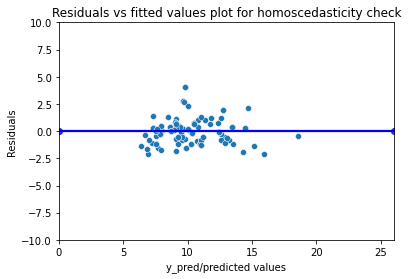

In [17]:
p = sns.scatterplot(Val_pre.Predicted,Val_pre.Residuals)

plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

plt.ylim(-10,10)
plt.xlim(0,26)

p = sns.regplot(x = [0,26],y=[0,0],color='blue')

p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

Goldfeld Quandt Test for Heteroscedacity test

In [18]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(Val_pre.Residuals, X_train)

lzip(name, test)

[('F statistic', 0.7487898487899921), ('p-value', 0.8889595228558267)]

**Normality of Residuals**

C:\Users\win 8\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


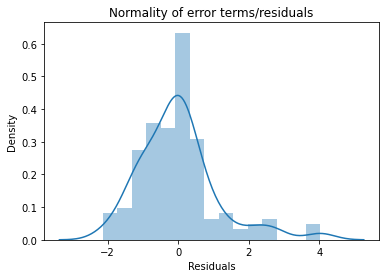

In [19]:
p = sns.distplot(Val_pre.Residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

**Autocorrelation of Residuals**

C:\Users\win 8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\win 8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


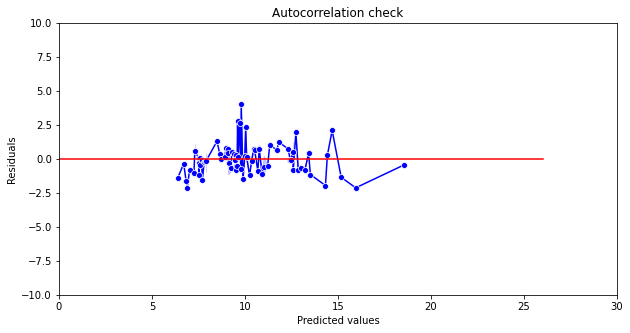

In [20]:
plt.figure(figsize=(10,5))
p = sns.lineplot(Val_pre.Predicted,Val_pre.Residuals,marker='o',color='blue')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')

plt.ylim(-10,10)
plt.xlim(0,30)

p = sns.lineplot([0,26],[0,0],color='red')

p = plt.title('Autocorrelation check')

Ljunbox Test for Autocorelation Testing

In [21]:
from statsmodels.stats import diagnostic as diag

min(diag.acorr_ljungbox(Val_pre.Residuals , lags = 40)[1])

C:\Users\win 8\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


0.4329296009055826

**Multicolinearity**

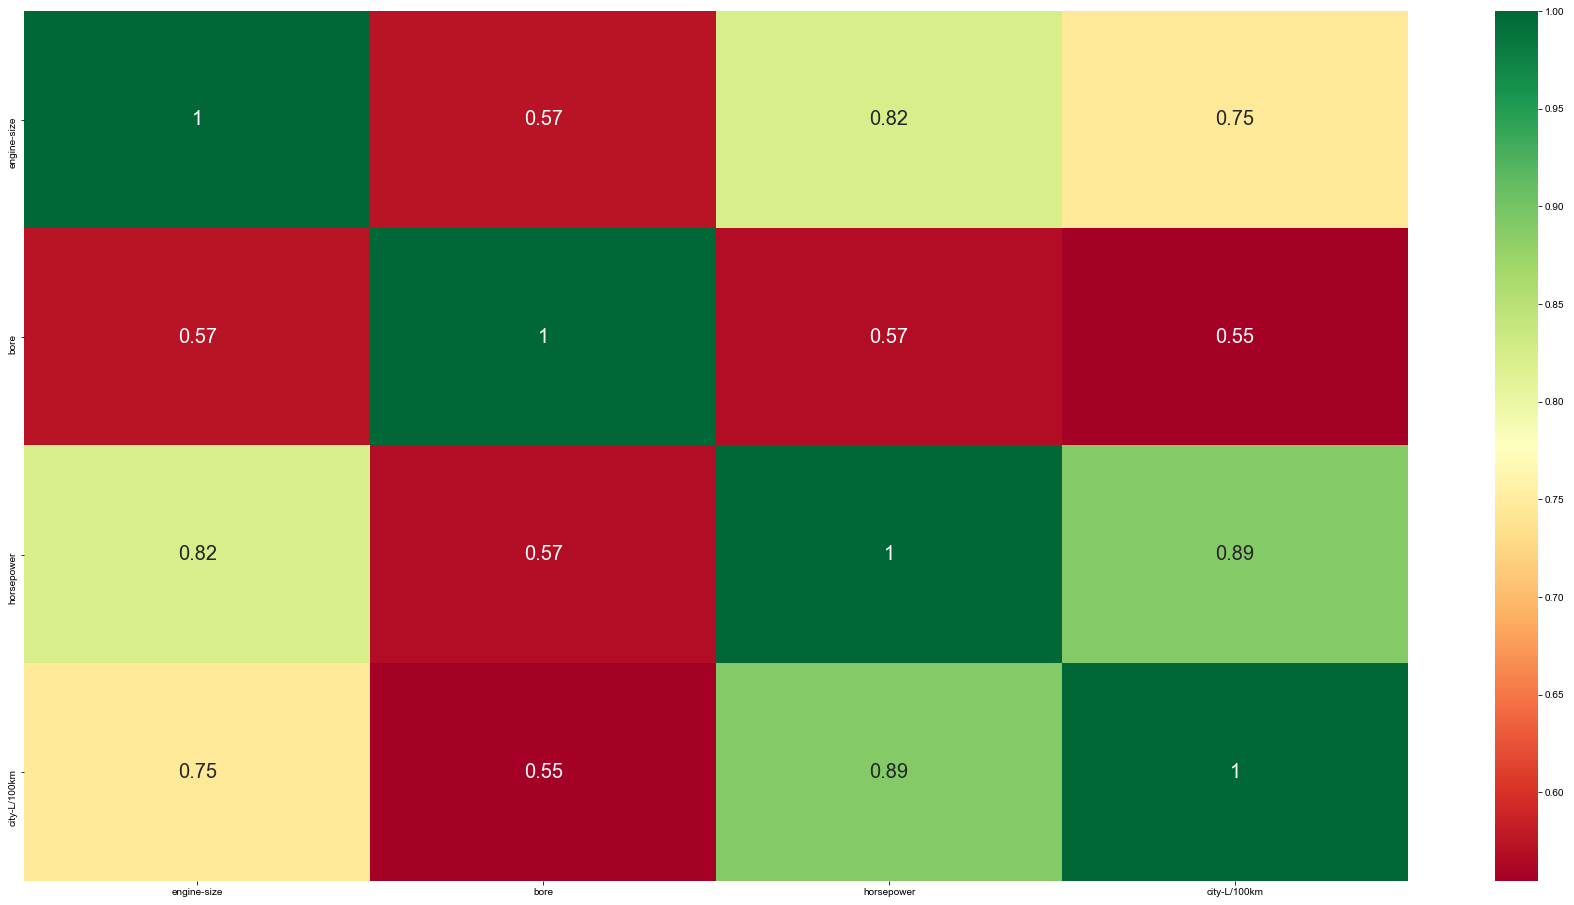

In [22]:
plt.figure(figsize=(31,16))
correlation = Dataset_mod.corr(method = 'pearson')

sns.heatmap(correlation,annot=True,cmap="RdYlGn",annot_kws={"size": 20})

sns.set(font_scale=1.4)

**Implementation in Data Testing**

In [23]:
y_pred_test = regressi.predict(X_test)

from  sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Mean Absolute Error: 0.9396648676784133
Mean Squared Error: 1.6046734780072007
Root Mean Squared Error: 1.266757071425773


In [24]:
prediction_test = pd.DataFrame(y_pred_test,columns = ["Predicted"])
prediction_test

prediction.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

Value_test = pd.concat( [prediction_test, y_test], axis=1)
Value_test

,Predicted,city-L/100km
0,7.709883,6.184211
1,8.173486,7.833333
2,9.895313,9.400000
3,12.583893,13.823529
4,12.604512,12.368421
5,8.715069,8.703704
6,10.039179,12.368421
7,7.303192,6.714286
8,10.767135,11.190476
9,7.915896,7.833333
